Importing required modules

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

<h3>Loading The Dataset</h3>

In [5]:
df = pd.read_csv('/content/Churn_Modelling (1).csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

Droping unwanted data

In [ ]:
df.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


<h3>Uni-Variate Analysis</h3>

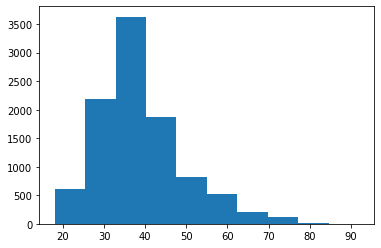

In [ ]:
plt.hist(df.Age)
plt.show()

<h3>Bi-Variate Analysis</h3>


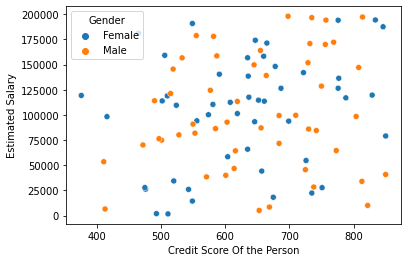

In [ ]:
sns.scatterplot(data=df[:100],x='CreditScore',y='EstimatedSalary',hue='Gender')
plt.xlabel('Credit Score Of the Person')
plt.ylabel('Estimated Salary')
plt.show()


Multi - Variate Analysis

<Figure size 288x288 with 0 Axes>

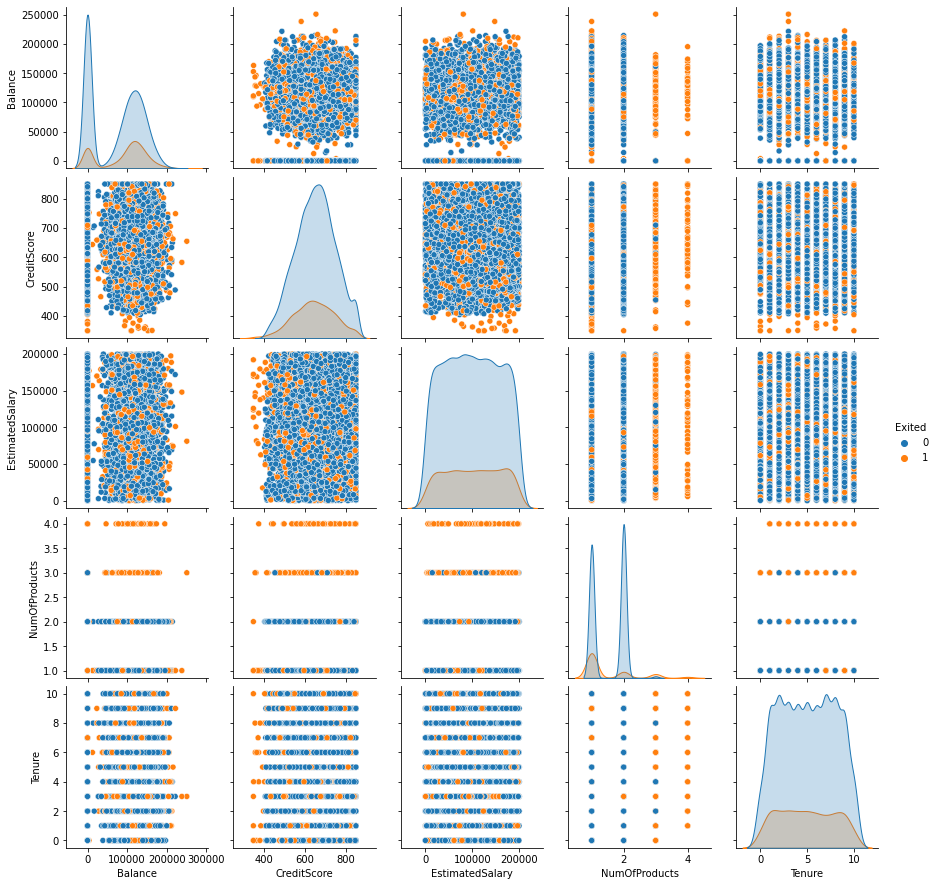

In [ ]:
plt.figure(figsize=(4,4))
sns.pairplot(data=df[["Balance","CreditScore","EstimatedSalary","NumOfProducts","Tenure","Exited"]],hue="Exited")

Descriptive Statistics

In [ ]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Handling Missing Values

In [ ]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Visualising the Outliers of Estimated Salary

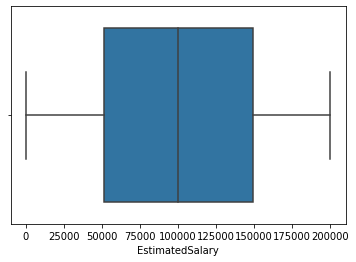

In [ ]:
sns.boxplot(x=df['EstimatedSalary'])

In [ ]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

Check for Categorical columns and perform encoding.

In [20]:
for col,i in enumerate(df.columns):
  print(col,i,len(df[i].unique()))
  

0 RowNumber 10000
1 CustomerId 10000
2 Surname 2932
3 CreditScore 460
4 Geography 3
5 Gender 2
6 Age 70
7 Tenure 11
8 Balance 6382
9 NumOfProducts 4
10 HasCrCard 2
11 IsActiveMember 2
12 EstimatedSalary 9999
13 Exited 2


no of categorical columns : 6
Geography , Gender , NumOfProducts , HasCrCard , IsActiveMember , Exited

In [25]:
 from sklearn.preprocessing import LabelEncoder
 label = LabelEncoder()
 li = ['Geography' , 'Gender' , 'NumOfProducts' , 'HasCrCard' , 'IsActiveMember' , 'Exited']
 for i in li:
   encoded = label.fit_transform(df[i])
   df.drop(columns=[i],inplace=True)
   df[i] = encoded
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,EstimatedSalary,Geography,Gender,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,1,15634602,Hargrave,619,42,2,0.00,101348.88,0,0,0,1,1,1
1,2,15647311,Hill,608,41,1,83807.86,112542.58,2,0,0,0,1,0
2,3,15619304,Onio,502,42,8,159660.80,113931.57,0,0,2,1,0,1
3,4,15701354,Boni,699,39,1,0.00,93826.63,0,0,1,0,0,0
4,5,15737888,Mitchell,850,43,2,125510.82,79084.10,2,0,0,1,1,0


Split the data into dependent and independent variables.

In [ ]:
#Split the data into Dependent & Independent Variables
print("----------Dependent Variables----------")
X=df.iloc[:,1:4]
print(X)
print("---------Independent Variables---------")
Y=df.iloc[:,4]
print(Y)
print("---------------------------------------")

----------Dependent Variables----------
      Age  Tenure    Balance
0      42       2       0.00
1      41       1   83807.86
2      42       8  159660.80
3      39       1       0.00
4      43       2  125510.82
...   ...     ...        ...
9995   39       5       0.00
9996   35      10   57369.61
9997   36       7       0.00
9998   42       3   75075.31
9999   28       4  130142.79

[10000 rows x 3 columns]
---------Independent Variables---------
0       1
1       1
2       3
3       2
4       1
       ..
9995    2
9996    1
9997    1
9998    2
9999    1
Name: NumOfProducts, Length: 10000, dtype: int64
---------------------------------------


In [ ]:
X = pd.DataFrame(df.drop(['EstimatedSalary'],axis=1))
Y=pd.DataFrame(df['EstimatedSalary'],columns=['EstimatedSalary'])
X.head()
Y.head()

,EstimatedSalary
0,101348.88
1,112542.58
2,113931.57
3,93826.63
4,79084.10


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.32622142,  0.29351742, -1.04175968, ..., -0.57380915,
         1.09598752, -1.09598752],
       [-0.44003595,  0.19816383, -1.38753759, ...,  1.74273971,
         1.09598752, -1.09598752],
       [-1.53679418,  0.29351742,  1.03290776, ..., -0.57380915,
         1.09598752, -1.09598752],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -0.57380915,
         1.09598752, -1.09598752],
       [ 1.25683526,  0.29351742, -0.69598177, ..., -0.57380915,
        -0.91241915,  0.91241915],
       [ 1.46377078, -1.04143285, -0.35020386, ..., -0.57380915,
         1.09598752, -1.09598752]])

In [ ]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_Y = train_test_split(X,Y,test_size=0.3)